In [1]:
import pandas as pd
pd.set_option('max_colwidth', 50)
# set this if you need to
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

Unnamed: 0                name  age gender    raceethnicity     month  day  \
0           0  A'donte Washington   16   Male            Black  February   23   
1           1      Aaron Rutledge   27   Male            White     April    2   
2           2         Aaron Siler   26   Male            White     March   14   
3           3        Aaron Valdez   25   Male  Hispanic/Latino     March   11   
4           4        Adam Jovicic   29   Male            White     March   19   

   year           streetaddress          city state  \
0  2015            Clearview Ln     Millbrook    AL   
1  2015  300 block Iris Park Dr     Pineville    LA   
2  2015    22nd Ave and 56th St       Kenosha    WI   
3  2015       3000 Seminole Ave    South Gate    CA   
4  2015          364 Hiwood Ave  Munroe Falls    OH   

              lawenforcementagency    cause    armed  county_income  
0      Millbrook Police Department  Gunshot       No          54766  
1  Rapides Parish Sheriff's Office  Gunshot       No          40930  
2        Kenosha Police Department  Gunshot       No          54930  
3     South Gate Police Department  Gunshot  Firearm          55909  
4           Kent Police Department  Gunshot       No          49669

In [3]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings.rename(columns = {'lawenforcementagency':'agency', 'raceethnicity':'race'},inplace = True)
killings.head(1)

Unnamed: 0                name  age gender   race     month  day  year  \
0           0  A'donte Washington   16   Male  Black  February   23  2015   

  streetaddress       city state                       agency    cause armed  \
0  Clearview Ln  Millbrook    AL  Millbrook Police Department  Gunshot    No   

   county_income  
0          54766

In [4]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [5]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings = killings.fillna(value='Unknown') 
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [6]:
# 4. How many killings were there so far in 2015?
t2015 = killings.groupby('year').year.count()
t2015

year
2015    467
Name: year, dtype: int64

In [7]:
# 5. Of all killings, how many were male and how many female?
killings.groupby('gender').year.count()

gender
Female     22
Male      445
Name: year, dtype: int64

In [8]:
# 6. How many killings were of unarmed people?
unarmed = killings.armed[killings.armed == "No"].count()
unarmed # 102 people

102

In [9]:
# 7. What percentage of all killings were unarmed?
pcunarmed = (unarmed / t2015) * 100
pcunarmed

year
2015    21.841542
Name: year, dtype: float64

In [10]:
# 8. What are the 5 states with the most killings?
killings.groupby('state').year.count().sort_values(ascending=False).head(5)

state
CA    74
TX    46
FL    29
AZ    25
OK    22
Name: year, dtype: int64

In [11]:
# 9. Show a value counts of deaths for each race
killings.groupby('race').race.count().sort_values(ascending=False)

race
White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

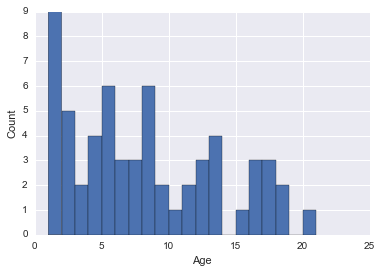

In [12]:
# 10. Display a histogram of ages of all killings
killings.groupby('age').age.count().hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11434e3d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b39f990>]], dtype=object)

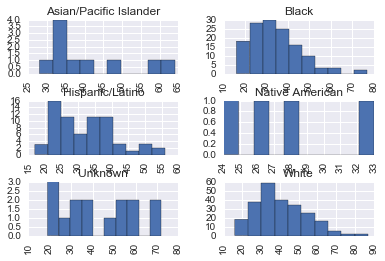

In [13]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race)

In [14]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

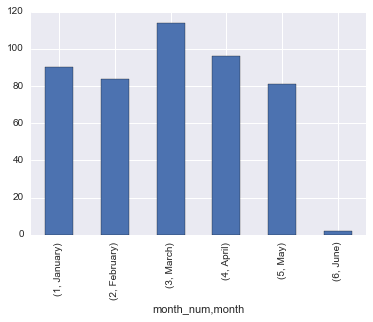

In [15]:
# 13. Show a bar chart with counts of deaths every month

# add a numeric month column to order bar chart
killings['month_num'] = killings['month']
killings.month_num.replace(['January', 'February', 'March', 'April', 'May','June'], 
                     [1, 2, 3, 4, 5, 6], inplace = True) 

# plot deaths counts by each months 
killings.groupby(['month_num','month']).month.count().plot(kind='bar')

In [16]:
###################
### Less Morbid ###
###################

In [17]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

Unnamed: 0  Major_code                                  Major  \
0           0        1100                    GENERAL AGRICULTURE   
1           1        1101  AGRICULTURE PRODUCTION AND MANAGEMENT   
2           2        1102                 AGRICULTURAL ECONOMICS   
3           3        1103                        ANIMAL SCIENCES   
4           4        1104                           FOOD SCIENCE   

                    Major_category   Total  Employed  \
0  Agriculture & Natural Resources  128148     90245   
1  Agriculture & Natural Resources   95326     76865   
2  Agriculture & Natural Resources   33955     26321   
3  Agriculture & Natural Resources  103549     81177   
4  Agriculture & Natural Resources   24280     17281   

   Employed_full_time_year_round  Unemployed  Unemployment_rate  Median  \
0                          74078        2423           0.026147   50000   
1                          64240        2266           0.028636   54000   
2                          22810         821           0.030248   63000   
3                          64937        3619           0.042679   46000   
4                          12722         894           0.049188   62000   

   P25th    P75th  
0  34000  80000.0  
1  36000  80000.0  
2  40000  98000.0  
3  30000  72000.0  
4  38500  90000.0

In [18]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
del majors['Employed_full_time_year_round']
del majors['Major_code']
majors.head(1)

Unnamed: 0                Major                   Major_category   Total  \
0           0  GENERAL AGRICULTURE  Agriculture & Natural Resources  128148   

   Employed  Unemployed  Unemployment_rate  Median  P25th    P75th  
0     90245        2423           0.026147   50000  34000  80000.0

In [19]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [20]:
# 3. What are the top 10 highest paying majors?

# Using Median as a metric to evaluate highest paying majors
top10 = majors.groupby('Major').Median.max().sort_values(ascending=False).head(10)
top10

# top10 = majors.groupby('Major').P25th.max().sort_values(ascending=False).head(10)
# 1. PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION
# top10 = majors.groupby('Major').P75th.max().sort_values(ascending=False).head(10)
# PETROLEUM ENGINEERING, MATHEMATICS AND COMPUTER SCIENCE 

Major
PETROLEUM ENGINEERING                                  125000
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION    106000
NAVAL ARCHITECTURE AND MARINE ENGINEERING               97000
METALLURGICAL ENGINEERING                               96000
NUCLEAR ENGINEERING                                     95000
MINING AND MINERAL ENGINEERING                          92000
MATHEMATICS AND COMPUTER SCIENCE                        92000
ELECTRICAL ENGINEERING                                  88000
CHEMICAL ENGINEERING                                    86000
GEOLOGICAL AND GEOPHYSICAL ENGINEERING                  85000
Name: Median, dtype: int64

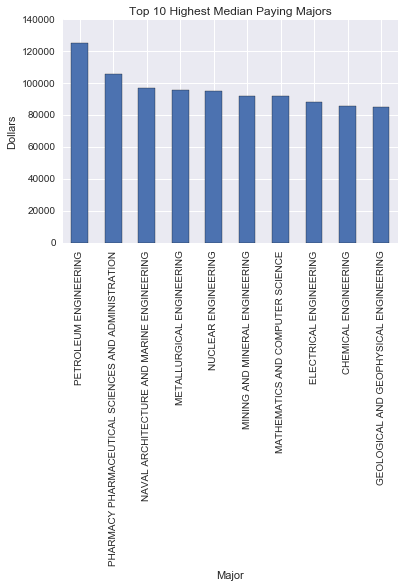

In [21]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
top10.plot(kind='bar')
plt.xlabel('Major')
plt.ylabel('Dollars')
plt.title('Top 10 Highest Median Paying Majors')

In [22]:
# 5. What is the average median salary for each major category?
major_cat = majors.groupby('Major_category').Median.mean()
major_cat.sort_values(ascending=False)

Major_category
Engineering                            77758.620690
Computers & Mathematics                66272.727273
Physical Sciences                      62400.000000
Business                               60615.384615
Health                                 56458.333333
Agriculture & Natural Resources        55000.000000
Social Science                         53222.222222
Law & Public Policy                    52800.000000
Industrial Arts & Consumer Services    52642.857143
Biology & Life Science                 50821.428571
Communications & Journalism            49500.000000
Humanities & Liberal Arts              46080.000000
Psychology & Social Work               44555.555556
Education                              43831.250000
Arts                                   43525.000000
Interdisciplinary                      43000.000000
Name: Median, dtype: float64

In [23]:
# 6. Show only the top 5 paying major categories
major_cat.sort_values(ascending=False).head(5)

Major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: Median, dtype: float64

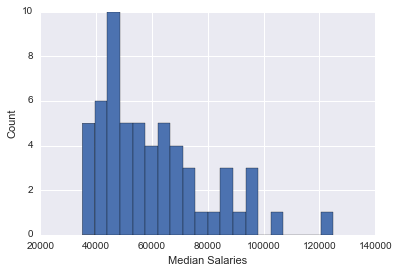

In [24]:
# 7. Plot a histogram of the distribution of median salaries
majors.groupby('Median').Median.max().sort_values(ascending=False).hist(bins = 20)
plt.xlabel('Median Salaries')
plt.ylabel('Count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bfc08d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d613ad0>]], dtype=object)

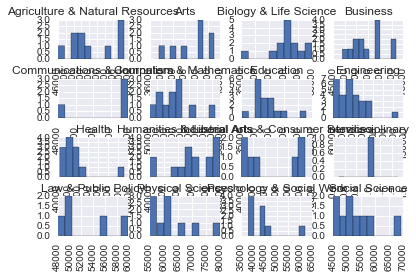

In [25]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors.Median.hist(by=majors.Major_category)

In [26]:
# 9. What are the top 10 most UNemployed majors?

# majors.groupby('Major').Unemployed.mean().sort_values(ascending=False).head(10)

# Using unemployment rate as metric to evaluate Most Unemplyed majors 
# majors.groupby('Major').Unemployment_rate.mean().sort_values(ascending=False).head(10)
majors.groupby(['Major','Unemployment_rate','Unemployed']).Unemployment_rate.mean().sort_values(ascending=False).head(10)

Major                                     Unemployment_rate  Unemployed
MISCELLANEOUS FINE ARTS                   0.156147           1190          0.156147
CLINICAL PSYCHOLOGY                       0.102712           587           0.102712
MILITARY TECHNOLOGIES                     0.101796           187           0.101796
SCHOOL STUDENT COUNSELING                 0.101746           169           0.101746
LIBRARY SCIENCE                           0.094843           743           0.094843
VISUAL AND PERFORMING ARTS                0.094658           4297          0.094658
COMPUTER PROGRAMMING AND DATA PROCESSING  0.090264           2265          0.090264
SOCIAL PSYCHOLOGY                         0.087336           660           0.087336
ASTRONOMY AND ASTROPHYSICS                0.086022           320           0.086022
ARCHITECTURE                              0.085991           20394         0.085991
Name: Unemployment_rate, dtype: float64

In [27]:
# What are the unemployment rates?
# majors.groupby('Major').Unemployment_rate.mean()
majors.groupby(['Major','Unemployment_rate']).Unemployed.max().sort_values(ascending=False).head(10)

Major                                   Unemployment_rate
BUSINESS MANAGEMENT AND ADMINISTRATION  0.058865             147261
GENERAL BUSINESS                        0.051378              85626
PSYCHOLOGY                              0.069667              79066
ACCOUNTING                              0.053415              75379
COMMUNICATIONS                          0.064360              54390
ENGLISH LANGUAGE AND LITERATURE         0.068645              52248
MARKETING AND MARKETING RESEARCH        0.055033              51839
POLITICAL SCIENCE AND GOVERNMENT        0.069374              40376
GENERAL EDUCATION                       0.043904              38742
BIOLOGY                                 0.059301              36757
Name: Unemployed, dtype: int64

In [28]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

# Why are these different?
# majors.groupby(['Major_category']).Unemployed.mean().sort_values(ascending=False).head(10)
# majors.groupby(['Major_category','Unemployed']).Unemployed.mean().sort_values(ascending=False).head(10)

majors.groupby(['Major_category','Unemployed','Unemployment_rate']).Unemployed.mean().sort_values(ascending=False).head(10)
# Why is there a space with Business - two diff business categories?

Major_category               Unemployed  Unemployment_rate
Business                     147261      0.058865             147261
                             85626       0.051378              85626
Psychology & Social Work     79066       0.069667              79066
Business                     75379       0.053415              75379
Communications & Journalism  54390       0.064360              54390
Humanities & Liberal Arts    52248       0.068645              52248
Business                     51839       0.055033              51839
Social Science               40376       0.069374              40376
Education                    38742       0.043904              38742
Biology & Life Science       36757       0.059301              36757
Name: Unemployed, dtype: int64

In [29]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate'] =  majors.Employed /  majors.Total 
majors.head()

Unnamed: 0                                  Major  \
0           0                    GENERAL AGRICULTURE   
1           1  AGRICULTURE PRODUCTION AND MANAGEMENT   
2           2                 AGRICULTURAL ECONOMICS   
3           3                        ANIMAL SCIENCES   
4           4                           FOOD SCIENCE   

                    Major_category   Total  Employed  Unemployed  \
0  Agriculture & Natural Resources  128148     90245        2423   
1  Agriculture & Natural Resources   95326     76865        2266   
2  Agriculture & Natural Resources   33955     26321         821   
3  Agriculture & Natural Resources  103549     81177        3619   
4  Agriculture & Natural Resources   24280     17281         894   

   Unemployment_rate  Median  P25th    P75th  sample_employment_rate  
0           0.026147   50000  34000  80000.0                0.704225  
1           0.028636   54000  36000  80000.0                0.806338  
2           0.030248   63000  40000  98000.0                0.775173  
3           0.042679   46000  30000  72000.0                0.783948  
4           0.049188   62000  38500  90000.0                0.711738

In [30]:
# 12. Create a "sample_unemployment_rate" colun
# this column should be 1 - "sample_employment_rate"
majors['sample_unemployment_rate'] =  1 - majors.sample_employment_rate 
majors.head()

Unnamed: 0                                  Major  \
0           0                    GENERAL AGRICULTURE   
1           1  AGRICULTURE PRODUCTION AND MANAGEMENT   
2           2                 AGRICULTURAL ECONOMICS   
3           3                        ANIMAL SCIENCES   
4           4                           FOOD SCIENCE   

                    Major_category   Total  Employed  Unemployed  \
0  Agriculture & Natural Resources  128148     90245        2423   
1  Agriculture & Natural Resources   95326     76865        2266   
2  Agriculture & Natural Resources   33955     26321         821   
3  Agriculture & Natural Resources  103549     81177        3619   
4  Agriculture & Natural Resources   24280     17281         894   

   Unemployment_rate  Median  P25th    P75th  sample_employment_rate  \
0           0.026147   50000  34000  80000.0                0.704225   
1           0.028636   54000  36000  80000.0                0.806338   
2           0.030248   63000  40000  98000.0                0.775173   
3           0.042679   46000  30000  72000.0                0.783948   
4           0.049188   62000  38500  90000.0                0.711738   

   sample_unemployment_rate  
0                  0.295775  
1                  0.193662  
2                  0.224827  
3                  0.216052  
4                  0.288262

In [31]:
###################
### More Tasty ###
###################

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [32]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# businesses.shape # (7544, 16)

business_id                                name  \
0           10                    Tiramisu Kitchen   
1           19               Nrgize Lifestyle Cafe   
2           24  OMNI S.F. Hotel - 2nd Floor Pantry   
3           31      Norman's Ice Cream and Freezes   
4           45                 CHARLIE'S DELI CAFE   

                         address           city postal_code   latitude  \
0                  033 Belden Pl  San Francisco       94104  37.791116   
1   1200 Van Ness Ave, 3rd Floor  San Francisco       94109  37.786848   
2  500 California St, 2nd  Floor  San Francisco       94104  37.792888   
3           2801 Leavenworth St   San Francisco       94133  37.807155   
4                3202 FOLSOM St            S.F.       94110  37.747114   

    longitude phone_number TaxCode  business_certificate application_date  \
0 -122.403816          NaN     H24              779059.0              NaN   
1 -122.421547          NaN     H24                   NaN              NaN   
2 -122.403135          NaN     H24              352312.0              NaN   
3 -122.419004          NaN     H24              346882.0              NaN   
4 -122.413641          NaN     H24              340024.0       10/10/2001   

                      owner_name                 owner_address     owner_city  \
0                   Tiramisu LLC                  33 Belden St  San Francisco   
1            24 Hour Fitness Inc  1200 Van Ness Ave, 3rd Floor  San Francisco   
2  OMNI San Francisco Hotel Corp  500 California St, 2nd Floor  San Francisco   
3               Norman Antiforda           2801 Leavenworth St  San Francisco   
4      HARB, CHARLES AND KRISTIN                  1150 SANCHEZ           S.F.   

  owner_state owner_zip  
0          CA     94104  
1          CA     94109  
2          CA     94104  
3          CA     94133  
4          CA     94114

In [33]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()
# inspections.shape # (27285, 4)

business_id  Score      date                   type
0           10    NaN  20140807  Reinspection/Followup
1           10   94.0  20140729  Routine - Unscheduled
2           10    NaN  20140124  Reinspection/Followup
3           10   92.0  20140114  Routine - Unscheduled
4           19   94.0  20141110  Routine - Unscheduled

In [34]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()
# violations.shape # (39720, 5)

business_id      date  ViolationTypeID  risk_category  \
0           10  20140114           103154       Low Risk   
1           10  20140114           103119  Moderate Risk   
2           10  20140114           103145       Low Risk   
3           10  20140729           103129  Moderate Risk   
4           10  20140729           103144       Low Risk   

                                         description  
0       Unclean or degraded floors walls or ceilings  
1  Inadequate and inaccessible handwashing facili...  
2   Improper storage of equipment utensils or linens  
3            Insufficient hot water or running water  
4   Unapproved or unmaintained equipment or utensils

In [35]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

# restaurant_scores = pd.merge(businesses, inspections, on = 'business_id')
# restaurant_scores = pd.merge(restaurant_scores, violations, on = 'business_id')
# restaurant_scores.shape # (239505, 23)

restaurant_scores = pd.merge(violations, inspections, how='left', on= ['business_id','date'])
restaurant_scores = pd.merge(restaurant_scores, businesses, how='left', on= 'business_id')
restaurant_scores.shape # (43963, 22)

# For Inspection questions
inspections_business = pd.merge(inspections, businesses, how = 'left', on= ['business_id'])
inspections_business.shape # (27231, 19)

restaurant_scores.head(2)

business_id      date  ViolationTypeID  risk_category  \
0           10  20140114           103154       Low Risk   
1           10  20140114           103119  Moderate Risk   

                                         description  Score  \
0       Unclean or degraded floors walls or ceilings   92.0   
1  Inadequate and inaccessible handwashing facili...   92.0   

                    type              name        address           city  \
0  Routine - Unscheduled  Tiramisu Kitchen  033 Belden Pl  San Francisco   
1  Routine - Unscheduled  Tiramisu Kitchen  033 Belden Pl  San Francisco   

     ...      longitude  phone_number  TaxCode business_certificate  \
0    ...    -122.403816           NaN      H24             779059.0   
1    ...    -122.403816           NaN      H24             779059.0   

  application_date    owner_name owner_address     owner_city owner_state  \
0              NaN  Tiramisu LLC  33 Belden St  San Francisco          CA   
1              NaN  Tiramisu LLC  33 Belden St  San Francisco          CA   

  owner_zip  
0     94104  
1     94104  

[2 rows x 22 columns]

In [36]:
# 2 Which ten business have had the most inspections?

restaurant_scores.groupby(['business_id','name']).business_id.count().sort_values(ascending=False).head(10)
# 1. business ID 10238 at 64 King of Thai Noodle House

# inspections_business.groupby(['business_id','name']).business_id.count().sort_values(ascending=False).head(10)
# 1.  business ID 1775 with 21 Sapporo-Ya 



business_id  name                        
10238        King of Thai Noodle House       64
75139        Hakka Restaurant                63
77693        SH Dream Inc                    58
71385        Yama Sushi Restaurant           58
2945         New Sun Hong Kong Restaurant    57
3151         New Asia Restaurant             54
63082        The Brick Yard                  52
1458         BIO                             50
64176        Dragon River Restaurant         48
33446        Usulutan Restaurant             48
Name: business_id, dtype: int64

In [37]:
# 3 Group and count the inspections by type
restaurant_scores.groupby('type').type.count()
# Routine - Unscheduled              39056

# inspections_business.groupby('type').type.count()
# Routine - Unscheduled                15519


type
Complaint                           2006
Complaint Reinspection/Followup       12
Foodborne Illness Investigation      188
New Construction                      45
New Ownership                       1120
Non-inspection site visit            208
Reinspection/Followup               1178
Routine - Scheduled                   60
Routine - Unscheduled              39056
Structural Inspection                 41
Name: type, dtype: int64

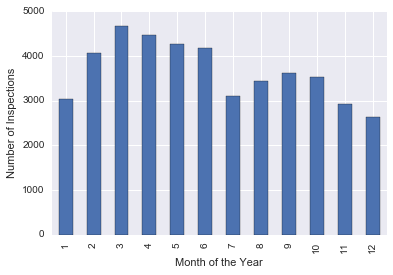

In [43]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

dates = pd.to_datetime(restaurant_scores.date, format='%Y%m%d')
restaurant_scores['date_mo'] = dates.dt.month
restaurant_scores['date_yr'] = dates.dt.year

restaurant_scores.groupby('date_mo').date_mo.count().plot(kind= 'bar')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Inspections')

# restaurant_scores_n = np.array(restaurant_scores)
# restaurant_scores_n = restaurant_scores_n.pivot("date_mo", "date_yr", "Score")
# ax = sns.heatmap(restaurant_scores_n)
# ax = sns.heatmap([date_yr,date_mo])
# type(date_yr)
# type(date_mo)
# uniform_data.shape
# type(restaurant_scores_n)


In [44]:
# 5 Which zip code contains the most high risk violations?

high_risk = restaurant_scores[restaurant_scores.risk_category=='High Risk']
high_risk.groupby(['postal_code','risk_category']).risk_category.count().sort_values(ascending=False).head(1)
# ZIP 94133 contains most high risk violations. 

postal_code  risk_category
94133        High Risk        618
Name: risk_category, dtype: int64

In [45]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

new_own = restaurant_scores[restaurant_scores.type=='New Ownership']
new_own.groupby('risk_category').risk_category.count().sort_values(ascending=False)

# More likely to be categorized as Low Risk. 

risk_category
Low Risk         553
Moderate Risk    419
High Risk        148
Name: risk_category, dtype: int64

In [46]:
# 7 Examining the descriptions, what is the most common violation?

# Most common violation is "Unclean or degraded floors walls or ceilings"
restaurant_scores.groupby('description').description.count().sort_values(ascending=False).head(1)

description
Unclean or degraded floors walls or ceilings    3757
Name: description, dtype: int64

In [47]:
# 8 What street has the best (safest) restaurants to dine out at?
# restaurant_scores.groupby('address').address.count().sort_values(ascending=False).head()

# pull out only the street name from the address
address = restaurant_scores.address.str.lower()
street = address.str.replace('\d+ ', '')
street = street.str.replace(',+ .+ ', '')
street = street.str.replace('.#.+', '')

restaurant_scores['street'] = street

# use the street to group the scores by. Assuming a high Score = Safe place to eat 
restaurant_scores.groupby(['street']).Score.mean().sort_values(ascending=False).head(10)


# Quetion: How do I get just the street out? 
# I am missing so many odd cases with the way I have construted my regexp right now. 

street
mendell st                              100.0
font                                    100.0
20th ave p182                            99.5
30th ave                                 98.0
 pier                                    98.0
jerrold ave unit z                       98.0
harding park road                        98.0
 nw corner post at stockton st (n/w)     98.0
barneveld ave                            98.0
 macys - geary entrance                  98.0
Name: Score, dtype: float64

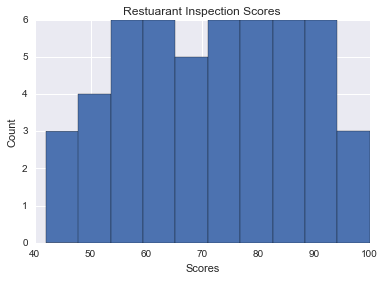

In [48]:
# 9 Create a hist of the scores with 10 bins
restaurant_scores.groupby('Score').Score.min().hist(bins = 10)
plt.xlabel('Scores')
plt.ylabel('Count')
plt.title('Restuarant Inspection Scores')

# does it matter if I use .mean or .max or .min or etc in this problem? 

In [434]:
# 8 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/
from bs4 import BeautifulSoup # a python HTML parser (version 3)
# r = requests.get('https://www.instagram.com/developer/endpoints/locations/')
# b = BeautifulSoup(r.text, 'html.parser')


